# Part 1 of Axis Scaling: Global Scale Adjustment

This page is primarily based on the following page at the Circos documentation site:



- [1. Global Scale Adjustment](????????????)



That page is the first part of the ??? part ['Axis Scaling' section](http://circos.ca/documentation/tutorials/quick_start/) of [the larger set of Circos tutorials](http://circos.ca/documentation/tutorials/).



Go back to the end of the previous section by clicking [here &#8592;](2d_data_tracks_Part12.ipynb).



----



7 --- Axis Scaling
==================

1. Global Scale Adjustment
--------------------------

::: {#menu4}
[[Lesson](/documentation/tutorials/scaling/global_scale/lesson){.clean}]{.active}
[Images](/documentation/tutorials/scaling/global_scale/images){.normal}
[Configuration](/documentation/tutorials/scaling/global_scale/configuration){.normal}
:::

This series of tutorials focuses on adjusting ideogram scale, both
globally and locally. By scale I mean the quantity

```ini
scale = size/degree
```


which defines the magnification factor of each ideogram on the image.

By default, if you draw all (or some) of the ideograms using

```ini
chromosomes_display_default = yes
```


all ideograms will have the same magnification. This means that the
angles they subtend are proportional to the length of the ideogram.
Unless you change the scale locally, this proportionality factor is
constant across the entire image.

The first image in this example shows the entire human genome---about
3Gb--- fit in 360 degrees. This gives a scale of about 8 Mb/degree. The
circumference of the ideogram circle for an 800 x 800 pixel image (the
resolution of the images in this example) is about 2000 pixels. When
expressed in terms of pixels, the scale is 1.5 Mb/pixel at the radius of
the ideograms.

::: {.issuebox}
The output resolution of a figure (screen or print) limits how finely
you should sample your data. Please read my [Limits of Human Visual
Acuity and Consequences on Sequence
Visualization](http://mkweb.bcgsc.ca/vizbi/2012/resolution/resolution.pdf%3C/p%3E)
for useful guidelines.
:::

### increasing image size

The simplest way to make *everything* larger is to increase the size of
the output image. The best way to do this is to override the `radius`
parameter in the [\<image\>]{.syn-block} block.

```ini
<image>
<<include etc/image.conf>>
radius* = 3000p
</image>
```


The default value is `radius = 1500p`, which creates images 3,000 x
3,000 pixels in size. This is generally sufficient (\>300 dpi) for
images printed at 10 inches or less.

### global scale control

Within an image you can adjust the magnification factor of individual
ideograms, or groups of ideograms. This is useful to do because genomes
tend to be interesting in spots.

You can adjust the length scale for each ideogram using the
`chromosomes_scale` parameter. The parameter associates a magnification
with each ideogram. For example,

```ini
chromosomes_scale = hs1:0.2;hs2:0.2;hs3:0.2;hs8:5;hs9:5;hs10:5
```


would result in chromosomes 1, 2, and 3 drawn at 0.2x their size and
chromosomes 8, 9, and 10 drawn at 5x. All other ideograms are scaled
appropriately so that all elements fit within the circle.

### adjusting scale for multiple ideograms

You can individually enumerate the ideograms for which scale should be
adjusted, as shown above, or use a regular expression to select more
than one ideogram.

For example, to shrink all ideograms matching the regular expression
`/rn/`,

```ini
chromosomes_scale = /rn/:0.5
```


You can combine regular expressions with lists. This will apply a scale
of 2x to `rn5`, with all other `rn` ideograms shown at 0.5x.

```ini
chromosomes_scale = /rn/:0.5;rn5:2
```


### scale-driven display of ticks and tick labels

By defining the `tick_separation` and `label_separation` parameters in
the [\<ticks\>]{.syn-block} block, you can supress the display of ticks
and their labels in areas where they appear densely. This is useful to
help avoid micro-managing tick and label over-crowding.

Another parameter that helps manage tick labels is
`min_label_distance_to_edge`, which controls the display of labels which
are too close to the edge of an ideogram. This parameter is useful if
ideograms are closely spaced and their edge tick labels start to
overlap. You can also use this parameter to effectively hide the first
tick label (typically 0).

```ini
<ticks>
tick_separation = 3p
label_separation = 10p
min_label_distance_to_edge = 10p
...
</ticks>
```


### toggling ticks by ideogram

When changing the scale of ideograms, you may need to toggle the display
of ticks for specific ideograms to keep the image clean. One use case is
to show ticks only for the first ideogram, to establish the scale for
the image, and then only for subsequent ideograms for which scale
changes.

To hide ticks for specific ideograms (e.g. chr9), use `chromosomes`
parameter in the [\<tick\>]{.syn-block} block

```ini
<tick>
chromosomes = -hs9
spacing     = 0.5u
...
</tick>
```


To display ticks on specific ideograms (e.g. chr9),

```ini
<tick>
chromosomes_display_default = no
chromosomes = hs9
spacing     = 0.5u
...
</tick>
```


----

### Generating the plot produced by this example code


The following two cells will generate the plot. The first cell adjusts the current working directory.

In [1]:
%cd ../circos-tutorials-0.67/tutorials/7/1/

/home/jovyan/circos-tutorials-0.67/tutorials/7/1


In [2]:
%%bash
../../../../circos-0.69-6/bin/circos -conf circos.conf

debuggroup summary 0.34s welcome to circos v0.69-6 31 July 2017 on Perl 5.022000
debuggroup summary 0.34s current working directory /home/jovyan/circos-tutorials-0.67/tutorials/7/1
debuggroup summary 0.34s command ../../../../circos-0.69-6/bin/circos -conf circos.conf
debuggroup summary 0.34s loading configuration from file circos.conf
debuggroup summary 0.34s found conf file circos.conf
debuggroup summary 0.50s debug will appear for these features: output,summary
debuggroup summary 0.50s bitmap output image ./circos.png
debuggroup summary 0.50s SVG output image ./circos.svg
debuggroup summary 0.50s parsing karyotype and organizing ideograms
debuggroup summary 0.60s karyotype has 24 chromosomes of total size 3,095,677,436
debuggroup summary 0.61s applying global and local scaling
debuggroup summary 0.62s allocating image, colors and brushes
debuggroup summary 2.56s drawing 24 ideograms of total size 3,095,677,436
debuggroup summary 2.56s drawing highlights and ideograms
debuggroup outp

Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.


View the plot in this page using the following cell.

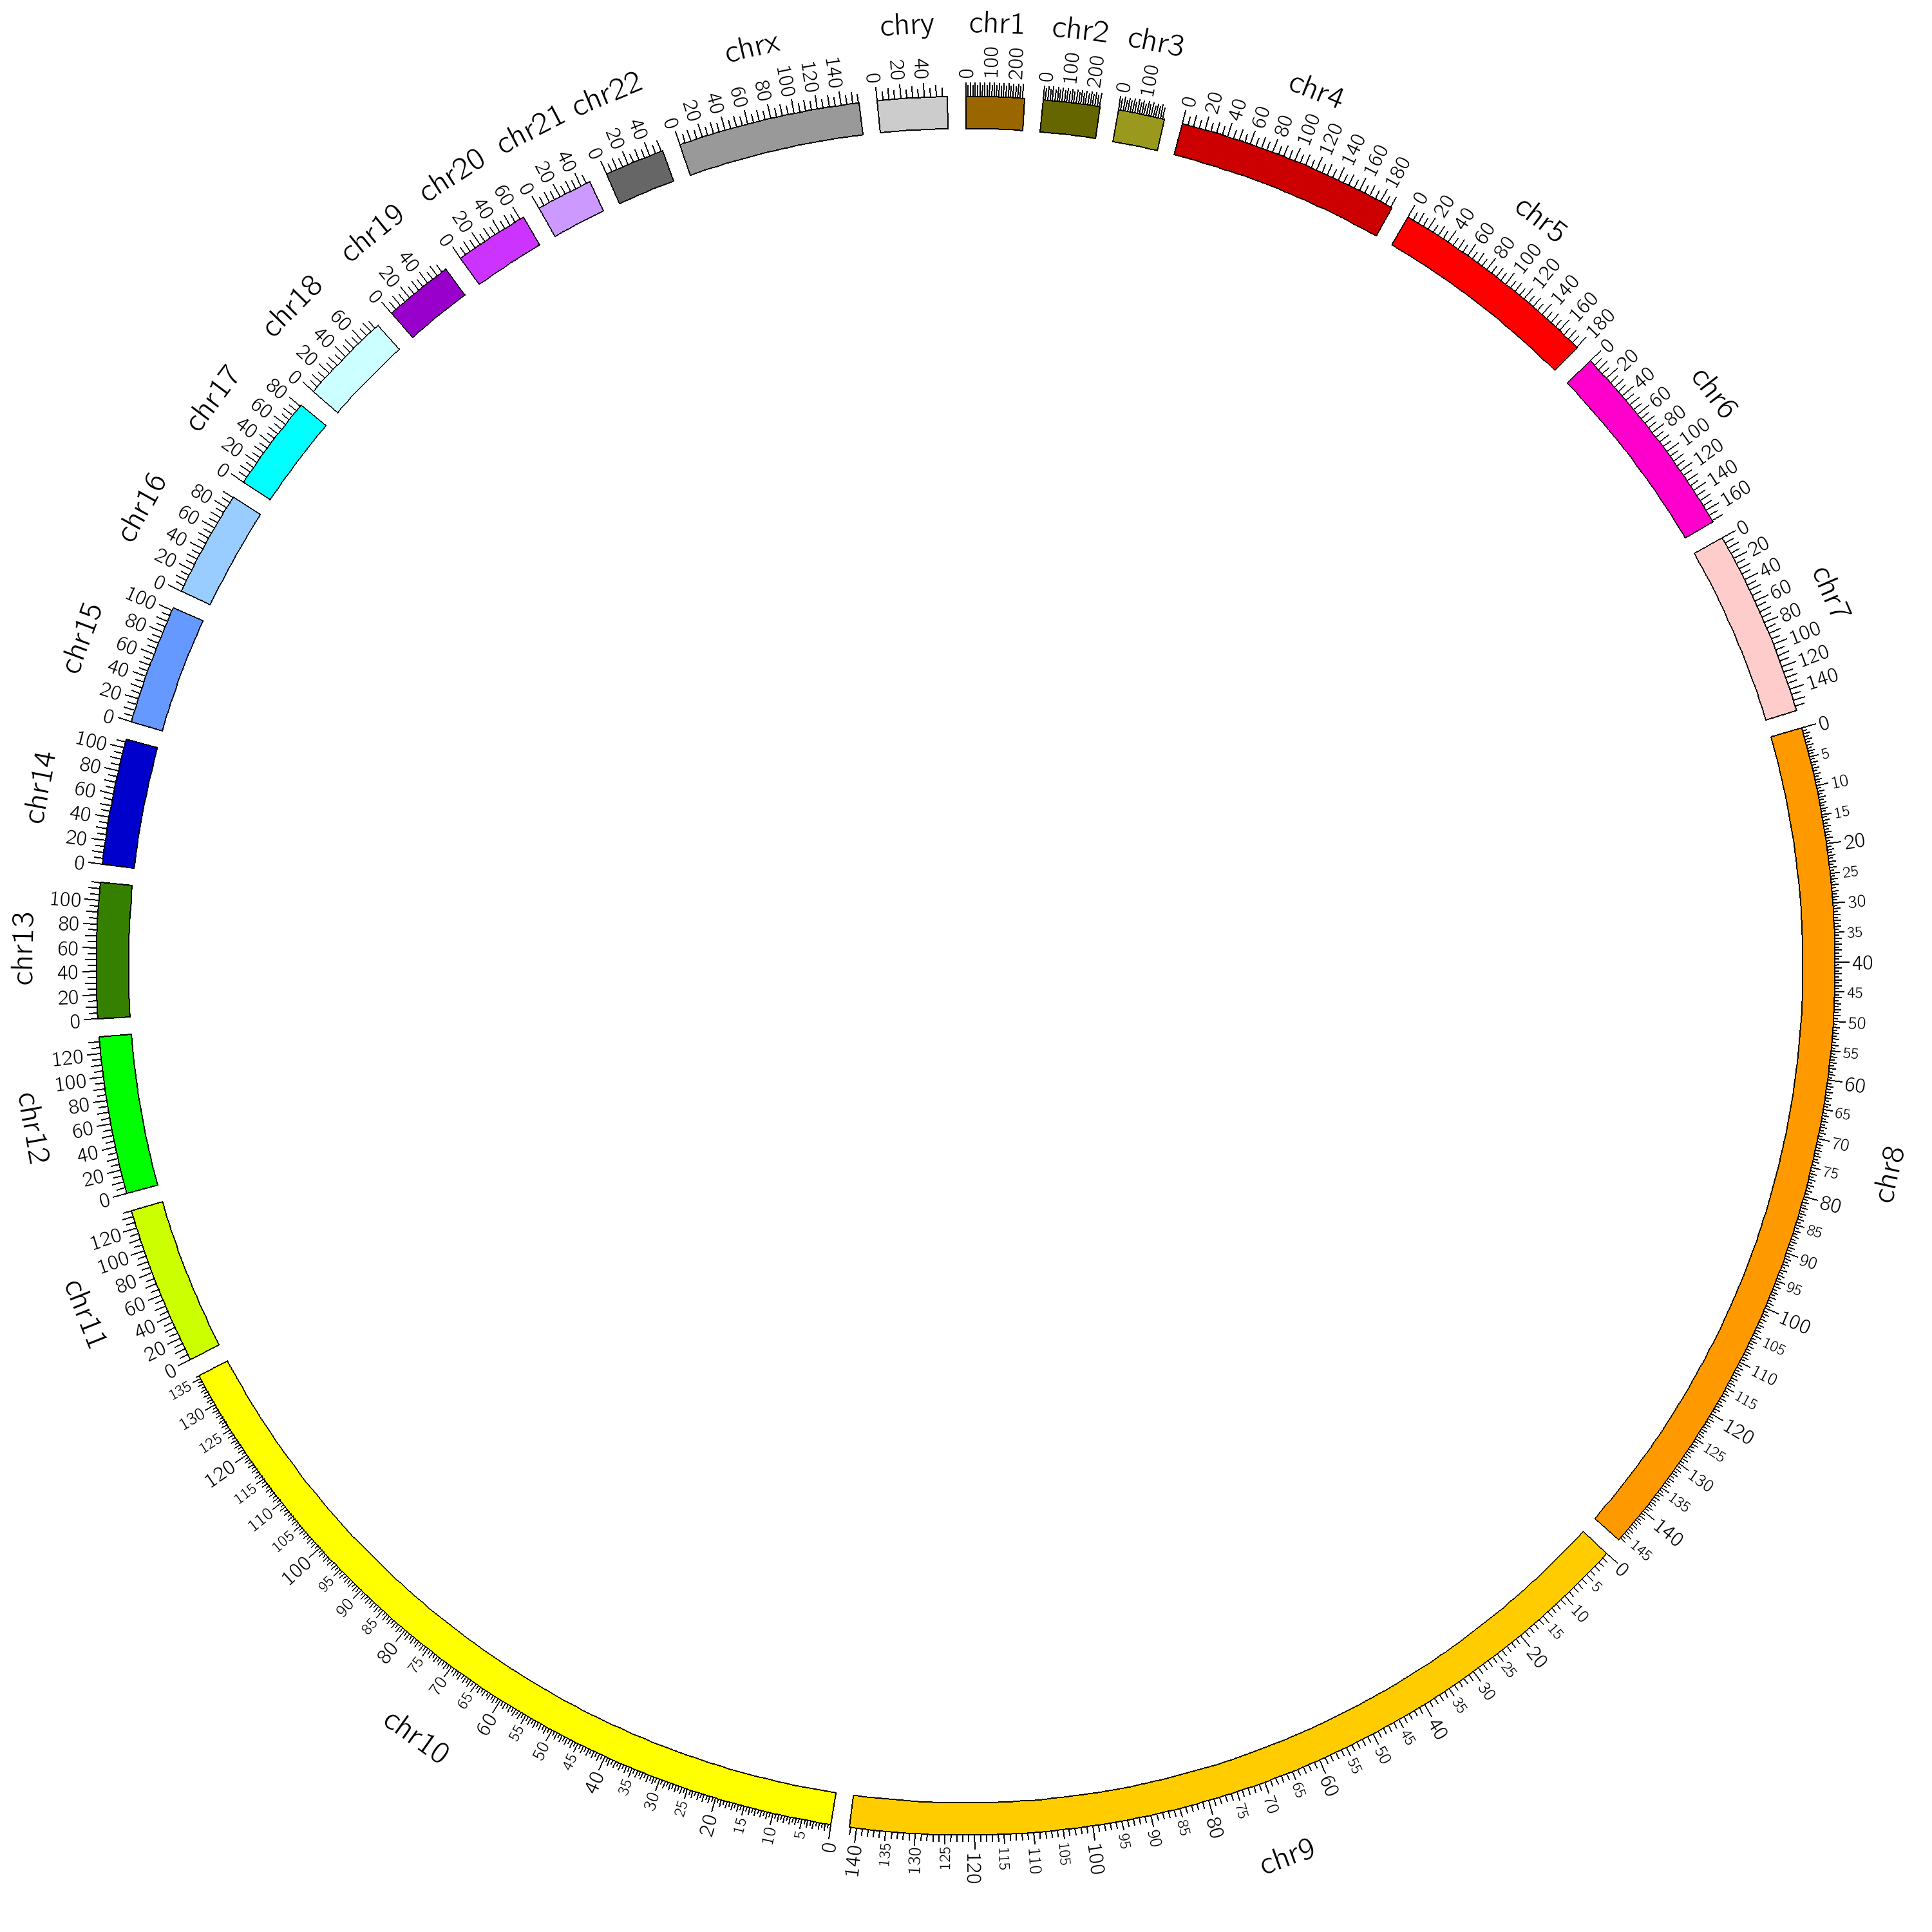

In [3]:
from IPython.display import Image
Image("circos.png")

----

Continue on to the next part of the Axis Scaling series by clicking [here &#10145;](AxisScaling_Part2.ipynb).

----